In [1]:
import sys
import pandas as pd
import numpy as np
from scipy.io import whosmat
from scipy.io import loadmat
from io import BytesIO
import datetime

print(sys.executable)

g:\DIYguru\Data-Science-and-Engineering-Analytics\.venv\Scripts\python.exe


### Dataset Acquisition

In [ ]:
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'))

In [ ]:
file_path_B0005 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'
file_path_B0006 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'
file_path_B0007 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'
file_path_B0018 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'

data_B0005 = loadmat(file_path_B0005, struct_as_record=False, squeeze_me=True)
data_B0006 = loadmat(file_path_B0006, struct_as_record=False, squeeze_me=True)
data_B0007 = loadmat(file_path_B0007, struct_as_record=False, squeeze_me=True)
data_B0018 = loadmat(file_path_B0018, struct_as_record=False, squeeze_me=True)

# Access the struct
b0005 = data_B0005['B0005']
b0006 = data_B0006['B0006']
b0007 = data_B0007['B0007']
b0018 = data_B0018['B0018']

# Check what attributes (fields) this struct has
print('b0005 \n',dir(b0005))
print('b0006 \n',dir(b0006))
print('b0007 \n',dir(b0007))
print('b0018 \n',dir(b0018))

In [ ]:
print(b0005.cycle)
print(b0006.cycle)
print(b0007.cycle)
print(b0018.cycle)

In [ ]:
#cycles = b0005.cycle
#cycles = b0006.cycle
#cycles = b0007.cycle
cycles = b0018.cycle

print(type(cycles))

In [ ]:
print(len(cycles),"\n")

print(cycles[0],"\n")
print([col for col in dir(cycles[0]) if not col.startswith('_')],"\n") 

print(cycles[0].data,"\n")
print([col for col in dir(cycles[0].data) if not col.startswith('_')],"\n") 


In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i]) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i].data) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print(f"cycle {i}: ambient_temperature = {cycles[i].ambient_temperature}")
    print(f"cycle {i}: time = {cycles[i].time}")
    print(f"cycle {i}: type = {cycles[i].type}")
    if cycles[i].type == 'charge':
        print(f"cycle {i}: Current_charge = {cycles[i].data.Current_charge}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_charge = {cycles[i].data.Voltage_charge}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'discharge':
        print(f"cycle {i}: Capacity = {cycles[i].data.Capacity}")
        print(f"cycle {i}: Current_load = {cycles[i].data.Current_load}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_load = {cycles[i].data.Voltage_load}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'impedance':
        print(f"cycle {i}: Battery_current = {cycles[i].data.Battery_current}")
        print(f"cycle {i}: Battery_impedance = {cycles[i].data.Battery_impedance}")
        print(f"cycle {i}: Current_ratio = {cycles[i].data.Current_ratio}")
        print(f"cycle {i}: Rct = {cycles[i].data.Rct}")
        print(f"cycle {i}: Re = {cycles[i].data.Re}")
        print(f"cycle {i}: Rectified_Impedance = {cycles[i].data.Rectified_Impedance}")
        print(f"cycle {i}: Sense_current = {cycles[i].data.Sense_current}")
    

- **def export_cycles_flattened(battery_name, cycles, export_filename, N=None):**
    - Defines a function to flatten and export battery cycle data.
    - `battery_name`: Name/identifier of the battery (used in output).
    - `cycles`: Iterable/list of cycle objects (each could be charge/discharge/impedance).
    - `export_filename`: Output filename for the CSV.
    - `N`: Number of cycles to process (if `None` or `0`, process all cycles).

- **rows = []**
    - Initialize an empty list to store each "flattened" row.

- **total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))**
    - Decide how many cycles to process: all if `N` not provided, or up to `N` cycles.

- **for i, cycle in enumerate(cycles):**
    - Loop over each cycle with index `i`.

- **if i >= total_cycles:**
    - If processed enough cycles, break out of loop.

- **cycle_type = getattr(cycle, 'type', None)**
    - Get the cycle's type attribute ('charge', 'discharge', 'impedance', etc).

- **if not hasattr(cycle, 'data'):**
    - If the cycle has no 'data' attribute, skip this cycle.

- **data = cycle.data**
    - Get the data object for the current cycle.

- **if cycle_type == 'charge':**
    - For charge cycles, define relevant columns.

- **columns = [...]**
    - Specify the list of attributes to extract, depending on the cycle type.

- **elif cycle_type == 'discharge':**
    - For discharge cycles, define different relevant columns.

- **elif cycle_type == 'impedance':**
    - For impedance cycles, yet another set of columns is defined.

- **else:**
    - If cycle type doesn't match any expected, skip the cycle.

- **arr_lens = []**
    - Prepare to find the length of each data array for the chosen columns.

- **for col in columns:**
    - For each column to extract:

- **arr = getattr(data, col, None)**
    - Get the array for the current column, if it exists.

- **if arr is not None and hasattr(arr, '__len__'):**
    - Check if the data exists and is an array with a length.

- **arr_lens.append(len(arr))**
    - Store the array length for this column.

- **if not arr_lens:**
    - If no arrays found, skip this cycle.

- **min_len = min(arr_lens)**
    - Find the (minimum) length of these arrays; ensures no index-out-of-bounds below.

- **for idx in range(min_len):**
    - Loop over array indices, up to the shortest array length (to keep data aligned).

- **row = { ... }**
    - Create a new dictionary to represent a single "flattened" row, including:
        - battery_name, cycle index, type, ambient temp, time (as a datetime).

- **if cycle_type == 'impedance':**
    - If current type is impedance, columns are postprocessed for real part.

- **for col in columns:**
    - For all columns of this cycle type:

- **arr = getattr(data, col, None)**
    - Fetch the column's array again.

- **value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None**
    - Safely retrieve the value at current index.

- **row[col] = np.real(value) if value is not None else None**
    - For impedance, store just the real component if it's complex; else None.

- **else:**
    - For other types ('charge'/'discharge'):

- **row[col] = value**
    - Store the value as-is.

- **rows.append(row)**
    - Add this row (dictionary) to the list of all rows.

- **df = pd.DataFrame(rows)**
    - Create a pandas DataFrame from the collected rows.

- **df.to_csv(export_filename, index=False)**
    - Save the DataFrame to CSV (no row index).

- **print(f"Exported flattened DataFrame to {export_filename}")**
    - Print a confirmation message.

- **return df**
    - Return the created DataFrame for further use.

In [ ]:
def export_cycles_flattened(battery_name, cycles, export_filename, N=None):

    # No more type_counts logic, handle all cycles or as per N
    rows = []
    total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))

    for i, cycle in enumerate(cycles):
        if i >= total_cycles:
            break
        cycle_type = getattr(cycle, 'type', None)
        if not hasattr(cycle, 'data'):
            continue

        data = cycle.data
        if cycle_type == 'charge':
            columns = ['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']
        elif cycle_type == 'discharge':
            columns = ['Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']
        elif cycle_type == 'impedance':
            columns = ['Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']
        else:
            continue

        arr_lens = []
        for col in columns:
            arr = getattr(data, col, None)
            if arr is not None and hasattr(arr, '__len__'):
                arr_lens.append(len(arr))
        if not arr_lens:
            continue
        min_len = min(arr_lens)

        for idx in range(min_len):
            row = {
                'battery_name': battery_name,
                'cycle': i,
                'type': cycle_type,
                'ambient_temperature': getattr(cycle, 'ambient_temperature', None),
                'time': datetime.datetime(*[int(x) for x in getattr(cycle, 'time', [1970,1,1,0,0,0])])
            }
            if cycle_type == 'impedance':
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = np.real(value) if value is not None else None
            else:
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = value
            rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(export_filename, index=False)
    print(f"Exported flattened DataFrame to {export_filename}")
    return df

# Example usage:
# export_cycles_flattened(cycles, 'Flattened_b0006.csv', N=10)

In [ ]:
df = export_cycles_flattened('b0018', cycles, 'Flattened_b0018.csv', N=100)

In [ ]:
df.head()

### Data Load from Amazon s3 bucket

In [2]:
'''
This cell loads AWS credentials from a .env file using python-dotenv,
creates a boto3 S3 client with those credentials,
and lists all S3 buckets in the account.
'''

import os
from dotenv import load_dotenv
import boto3

# Load environment variables from .env
load_dotenv()

# Create boto3 client using loaded environment variables
s3 = boto3.client("s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name=os.getenv("AWS_DEFAULT_REGION")
)

# Example: list buckets
buckets = s3.list_buckets()
print("Your S3 Buckets:")
for bucket in buckets['Buckets']:
    print(f" - {bucket['Name']}")

Your S3 Buckets:
 - s3aravindh973515031797


In [3]:
from io import BytesIO

def read_parquet_from_s3(bucket_name, object_key):
        """
        Reads a Parquet file from an AWS S3 bucket using the global s3 client.

        Args:
            bucket_name: Name of the S3 bucket.
            object_key: Key (path) to the Parquet file in the S3 bucket.

        Returns:
            DataFrame containing the Parquet data.
        """
        response = s3.get_object(Bucket=bucket_name, Key=object_key)
        file_content = response['Body'].read()
        df = pd.read_parquet(BytesIO(file_content))
        return df

In [4]:
bucket_name = 's3aravindh973515031797'

response = s3.list_objects_v2(Bucket=bucket_name)
for item in response.get("Contents", []):
    print(item["Key"])

Cleaned up VED Source Data/
Cleaned up VED Source Data/df_ICE_HEV.parquet
Cleaned up VED Source Data/df_PHEV_EV.parquet
Cleaned up VED Source Data/df_VED.parquet
Cleaned up VED Source Data/df_combined.parquet
Cleaned up VED Source Data/df_dynamic_sample.parquet
Cleaned up VED Source Data/df_static.parquet
DIYguru ML Source Data/
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171101_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171108_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171115_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171122_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171129_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171206_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171213_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171220_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171227_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_180103_week.csv
DIYguru ML Source D

In [ ]:
#del df

NameError: name 'df' is not defined

In [147]:
bucket_name = 's3aravindh973515031797'
df = 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet'

In [148]:
df = read_parquet_from_s3(bucket_name, df)

In [149]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283795 entries, 0 to 283794
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   battery_name          283795 non-null  object 
 1   cycle                 283795 non-null  int64  
 2   type                  283795 non-null  object 
 3   ambient_temperature   283795 non-null  int64  
 4   time                  283795 non-null  object 
 5   Current_charge        245700 non-null  float64
 6   Current_measured      279544 non-null  float64
 7   Temperature_measured  279544 non-null  float64
 8   Time                  279544 non-null  float64
 9   Voltage_charge        245700 non-null  float64
 10  Voltage_measured      279544 non-null  float64
 11  Capacity              0 non-null       float64
 12  Current_load          33844 non-null   float64
 13  Voltage_load          33844 non-null   float64
 14  Battery_current       4251 non-null    float64
 15  

### Exploratory Data Analysis (EDA)

In [151]:
# unique battery name

print("battery_name \n",df['battery_name'].unique())
print("type \n",df['type'].unique())
print("cycle \n",df['cycle'].unique())

battery_name 
 ['b0005' 'b0006' 'b0007' 'b0018']
type 
 ['charge' 'discharge' 'impedance']
cycle 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [152]:
df[['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
0,b0005,charge,0,NaN,3.873017,-0.001201,24.655358
1,b0005,charge,0,NaN,3.479394,-4.030268,24.666480
2,b0005,charge,0,NaN,4.000588,1.512731,24.675394
3,b0005,charge,0,NaN,4.012395,1.509063,24.693865
4,b0005,charge,0,NaN,4.019708,1.511318,24.705069


In [153]:
df[df['type'] == 'charge'][['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
0,b0005,charge,0,NaN,3.873017,-0.001201,24.655358
1,b0005,charge,0,NaN,3.479394,-4.030268,24.666480
2,b0005,charge,0,NaN,4.000588,1.512731,24.675394
3,b0005,charge,0,NaN,4.012395,1.509063,24.693865
4,b0005,charge,0,NaN,4.019708,1.511318,24.705069


In [154]:
df[df['type'] == 'discharge'][['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
789,b0005,discharge,1,NaN,4.191492,-0.004902,24.330034
790,b0005,discharge,1,NaN,4.190749,-0.001478,24.325993
791,b0005,discharge,1,NaN,3.974871,-2.012528,24.389085
792,b0005,discharge,1,NaN,3.951717,-2.013979,24.544752
793,b0005,discharge,1,NaN,3.934352,-2.011144,24.731385


In [155]:
df[df['type'] == 'impedance'][['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
22900,b0005,impedance,40,NaN,NaN,NaN,NaN
22901,b0005,impedance,40,NaN,NaN,NaN,NaN
22902,b0005,impedance,40,NaN,NaN,NaN,NaN
22903,b0005,impedance,40,NaN,NaN,NaN,NaN
22904,b0005,impedance,40,NaN,NaN,NaN,NaN


In [156]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#del df_cap

In [161]:
df_cap= df[df['battery_name'] == 'b0005']

In [162]:
df_cap.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\DELL\AppData\Local\Temp\ipykernel_12392\3197075005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cap['Time'] = pd.to_datetime(df_cap['Time'], errors='coerce')


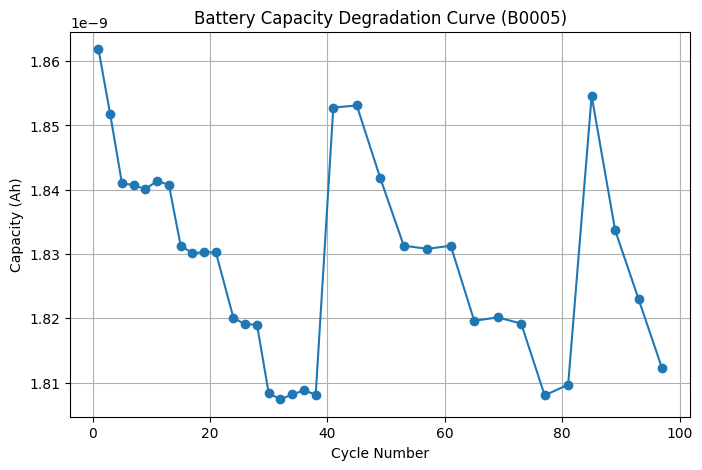

   cycle   capacity_Ah
0      1  1.861863e-09
1      3  1.851748e-09
2      5  1.841009e-09
3      7  1.840713e-09
4      9  1.840104e-09


In [163]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the time column to datetime
df_cap['Time'] = pd.to_datetime(df_cap['Time'], errors='coerce')

# Sort to ensure correct sequence per cycle
df_cap = df_cap.sort_values(['cycle', 'Time'])

# Compute time difference (in seconds) per cycle
df_cap['delta_t'] = df_cap.groupby('cycle')['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous capacity in Ah = (|I| * Δt) / 3600
df_cap['capacity_estimated'] = (df_cap['Current_measured'].abs() * df_cap['delta_t']) / 3600

# Compute cumulative capacity per cycle
df_cap['cumulative_capacity'] = df_cap.groupby('cycle')['capacity_estimated'].cumsum()

# Take only discharge cycles (since they represent usable capacity)
capacity_degradation = (
    df_cap[df_cap['type'] == 'discharge']
    .groupby('cycle')['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot Capacity Degradation Curve
plt.figure(figsize=(8,5))
plt.plot(capacity_degradation['cycle'], capacity_degradation['capacity_Ah'], marker='o')
plt.title('Battery Capacity Degradation Curve (B0005)')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True)
plt.show()

# Display summary
print(capacity_degradation.head())


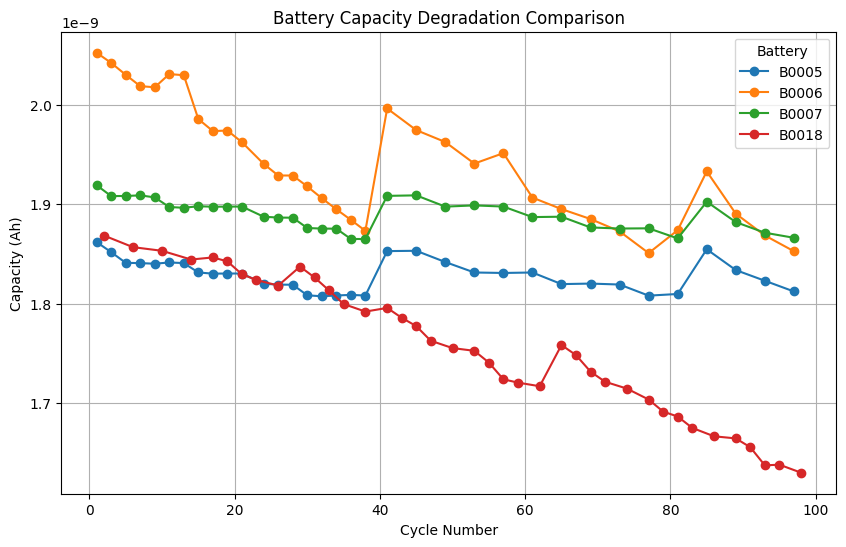

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Sort properly
df = df.sort_values(['battery_name', 'cycle', 'Time'])

# Compute delta time per battery per cycle
df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous Ah
df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600

# Compute cumulative capacity per cycle per battery
df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()

# Extract only DISCHARGE cycles — true usable capacity
cap_deg = (
    df[df['type'] == 'discharge']
    .groupby(['battery_name', 'cycle'])['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot all batteries
plt.figure(figsize=(10,6))

for b in cap_deg['battery_name'].unique():
    temp = cap_deg[cap_deg['battery_name'] == b]
    plt.plot(temp['cycle'], temp['capacity_Ah'], marker='o', label=b.upper())

plt.title("Battery Capacity Degradation Comparison")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.grid(True)
plt.legend(title="Battery")
plt.show()
